In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df=pd.read_csv("Company_data.csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
df1=df
df1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [5]:
label_encode=LabelEncoder()


In [6]:
df1['Urban_1']=label_encode.fit_transform(df1['Urban'])
df1['US_1']=label_encode.fit_transform(df1['US'])
df1['ShelveLoc_1']=label_encode.fit_transform(df1['ShelveLoc'])

In [7]:
df2=df1.drop(['ShelveLoc','Urban','US'], axis=1)
df2['High'] = df2.Sales.map(lambda x: 1 if x>8 else 0)
df2.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_1,US_1,ShelveLoc_1,High
395,12.57,138,108,17,203,128,33,14,1,1,1,1
396,6.14,139,23,3,37,120,55,11,0,1,2,0
397,7.41,162,26,12,368,159,40,18,1,1,2,0
398,5.94,100,79,7,284,95,50,12,1,1,0,0
399,9.71,134,37,0,27,120,49,16,1,1,1,1


In [8]:
X=df2.drop(['Sales','High'], axis=1)
y= df2['High']
print(X)
print(y)

     CompPrice  Income  Advertising  Population  Price  Age  Education  \
0          138      73           11         276    120   42         17   
1          111      48           16         260     83   65         10   
2          113      35           10         269     80   59         12   
3          117     100            4         466     97   55         14   
4          141      64            3         340    128   38         13   
..         ...     ...          ...         ...    ...  ...        ...   
395        138     108           17         203    128   33         14   
396        139      23            3          37    120   55         11   
397        162      26           12         368    159   40         18   
398        100      79            7         284     95   50         12   
399        134      37            0          27    120   49         16   

     Urban_1  US_1  ShelveLoc_1  
0          1     1            0  
1          1     1            1  
2        

In [17]:
df2['High'].unique()

array([1, 0], dtype=int64)

In [18]:
df2.High.value_counts()

0    236
1    164
Name: High, dtype: int64

In [19]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=40)

In [20]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

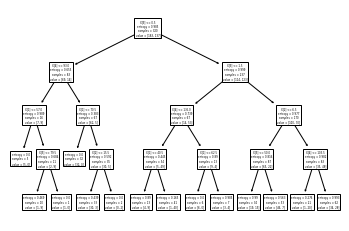

In [21]:
tree.plot_tree(model);

In [22]:
df2.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'Urban_1', 'US_1', 'ShelveLoc_1', 'High'],
      dtype='object')

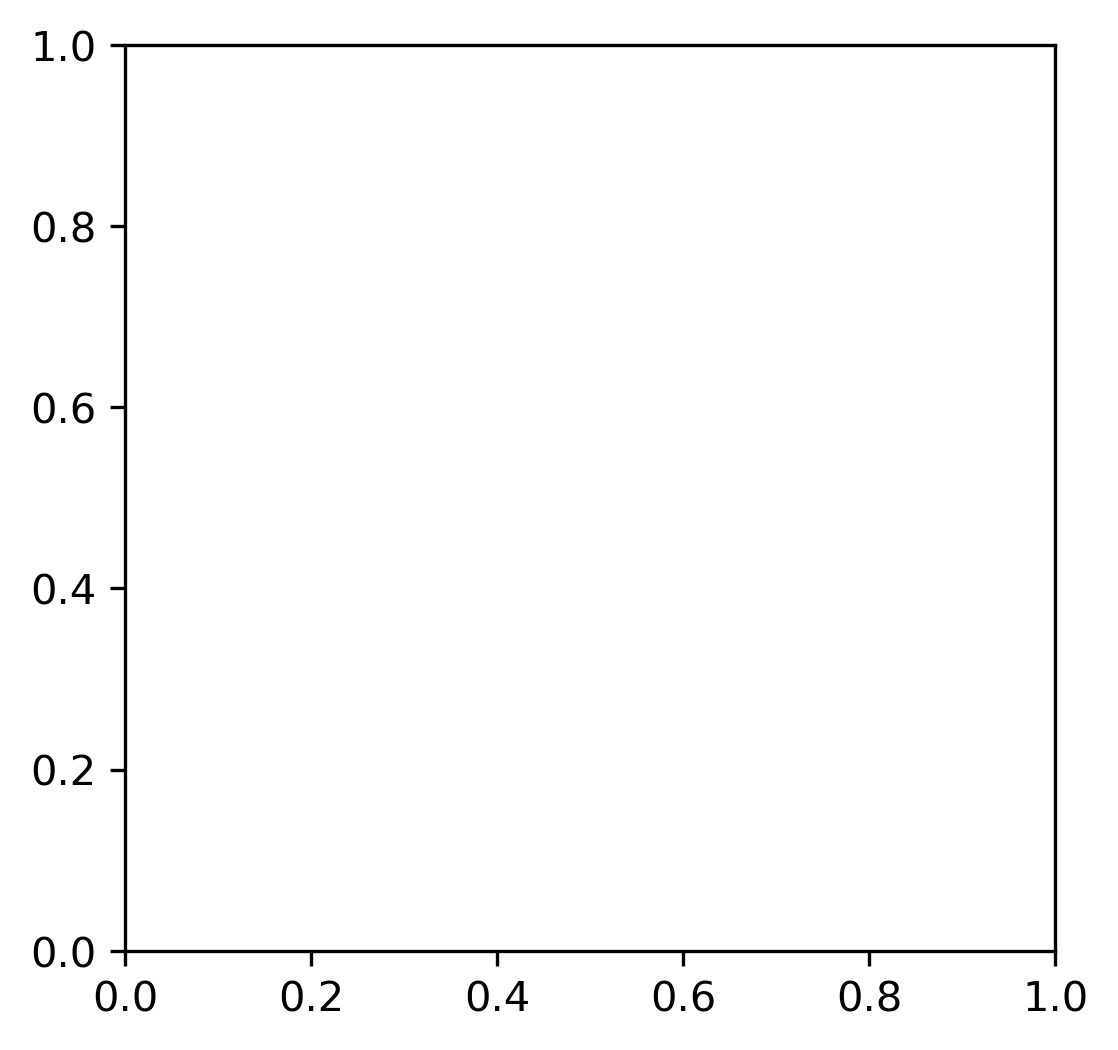

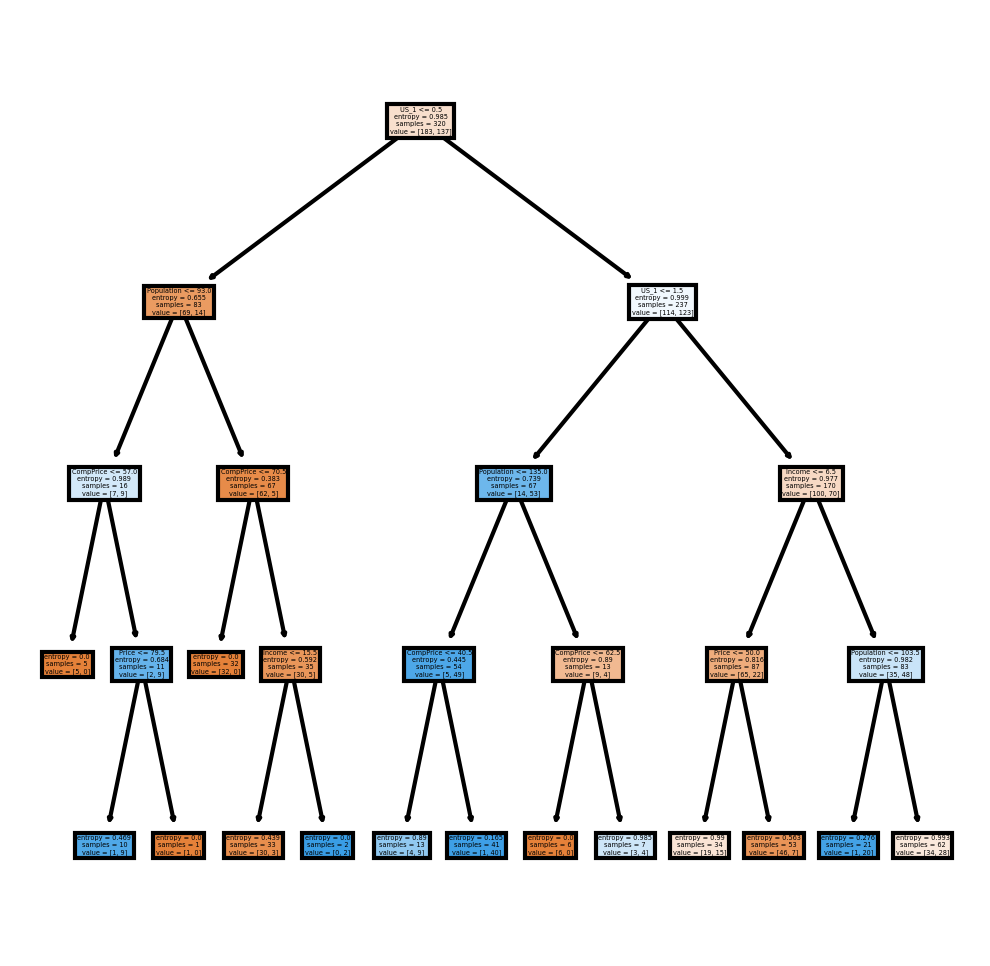

In [23]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price','Age','Education', 'Urban_1', 'US_1', 'ShelveLoc_1']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,filled = True);

In [33]:
#Predicting on test data
preds = model.predict(X_test) # predicting on test data set 
pd.Series(y_preds).value_counts() # getting the count of each category 

0    58
1    22
dtype: int64

In [34]:
preds

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [35]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
High,,
0,46,7
1,12,15


In [36]:
# Accuracy 
np.mean(preds==y_test)

0.7625

In [37]:
#-----------Finding the accuracy------------------------------------#
print("Accuracy : ", accuracy_score(y_test,preds)*100 )

Accuracy :  76.25


### Building Decision Tree Classifier (CART) using Gini Criteria

In [39]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=5)

In [40]:
model_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [41]:
#Prediction and computing the accuracy
pred=model.predict(X_test)
np.mean(preds==y_test)

0.7625

In [43]:
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

[[46  7]
 [12 15]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        53
           1       0.68      0.56      0.61        27

    accuracy                           0.76        80
   macro avg       0.74      0.71      0.72        80
weighted avg       0.76      0.76      0.76        80

